In [1]:
import numpy as np
from matplotlib import pyplot as plt
import json

# Load the first several singlet potential energy surfaces between r = 0.5 and r = 3.5 (300 points total)
pes = np.load("hf_pes_35_states_only_singlets_300_points.npy")

# Load the json file containing Franck-Condon factors between the X ^1\Sigma^+ and 1\Delta surfaces 
qed_fci_fcf = json.load(open("FCF_HF_QED-FCI-6311ppGss_1X_1D.json"))


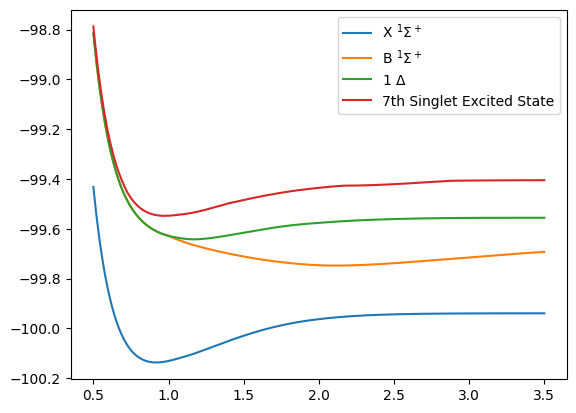

In [2]:
# Plot a few of the key potential energy surfaces
plt.plot(pes[:,0], pes[:,1], label="X $^1 \Sigma^+$")
plt.plot(pes[:,0], pes[:,4], label="B $^1 \Sigma^+$")
plt.plot(pes[:,0], pes[:,5], label="1 $\Delta$")
plt.plot(pes[:,0], pes[:,8], label="7th Singlet Excited State")
plt.legend()
plt.show()

In [10]:
omega = pes[70,1] - pes[70,8]

print(omega)
print(pes[70,0])

-0.5646682942999632
1.2023411371237458


The Franck-Condon factors are stored in the key "return_results","franck_condon_factors" in a list that 
has $n x n'$ elements long, where $n$ is the number of vibrational states on the lower surface and $n'$ is the number of vibrational states on the upper surface.  These are stored in "return_results", "maximum_franck_condon_factor".

In [3]:
# get dimensions 
n  = qed_fci_fcf["return_results"]["maximum_franck_condon_factor"][0]
nprime = qed_fci_fcf["return_results"]["maximum_franck_condon_factor"][1]

# capture franck-condon factors in a numpy array
fcf_array = np.array(qed_fci_fcf["return_results"]["franck_condon_factors"])

# reshape into a n x nprime array
fcf_matrix = fcf_array.reshape(n, nprime)

# print Franck-Condon factors between n = 0 and n' = 0, ..., 10
print(fcf_matrix[0,:])

[ 1.07905809e+00 -1.49183527e-01 -1.35543270e-01  1.36640681e-01
 -8.30858165e-02  4.07665907e-02 -1.66780580e-02  5.15296373e-03
 -7.14403295e-04 -1.10866024e-04]
